### import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as pxARIMA model: AutoRegressive Integrated Moving Average

ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular statistical method used for time series forecasting. Let's break down its components:

1. **AutoRegressive (AR)**: This component refers to the use of past values in the regression equation for forecasting the future values. It's based on the idea that the previous observations in the time series can be used to predict future values. The 'p' parameter in ARIMA(p, d, q) represents the order of the AR component, indicating how many past observations are included in the model.

2. **Integrated (I)**: This component signifies the differencing of raw observations (subtracting an observation from the previous one) to make the time series stationary. The 'd' parameter represents the order of differencing required to make the series stationary.

3. **Moving Average (MA)**: This component incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations. Like the 'q' parameter in ARIMA(p, d, q) denotes the order of the MA process, indicating the number of size of the moving average window.

So, in summary, ARIMA models use past observations, differences of those observations, and past forecast errors to make predictions about future values. 


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


#### NOTE:
The timeStamp column contains the time but it not read as `Timestamp` datatype instead is treated as string. To convert it into Timestamp form, we use the pandas function `to_datetime(df['column_name'])`

In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [6]:
df.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

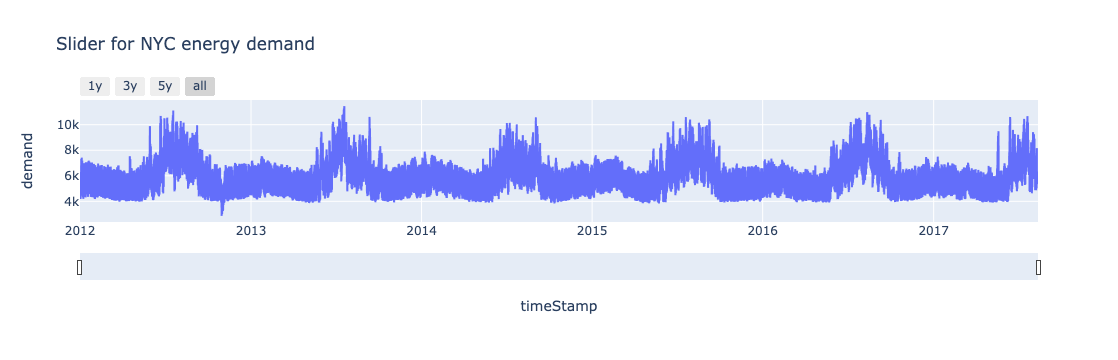

In [7]:
fig = px.line(df, x ='timeStamp', y = 'demand', title = 'Slider for NYC energy demand')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1y', step = "year"),
            dict(count = 2, label = '3y', step = "year"),
            dict(count = 3, label = '5y', step = "year"),
            dict(step = 'all')
            
        ])
    )
)

fig.show()


In [8]:
df.query('demand != demand')

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]

In [9]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')


In [10]:
df.isnull().any()

timeStamp    False
demand       False
precip        True
temp         False
dtype: bool

In [11]:
ny_df = df.set_index('timeStamp')

In [12]:
ny_df.resample('M').mean()

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [13]:
ny_df.isnull().sum()

demand      0
precip    230
temp        0
dtype: int64

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

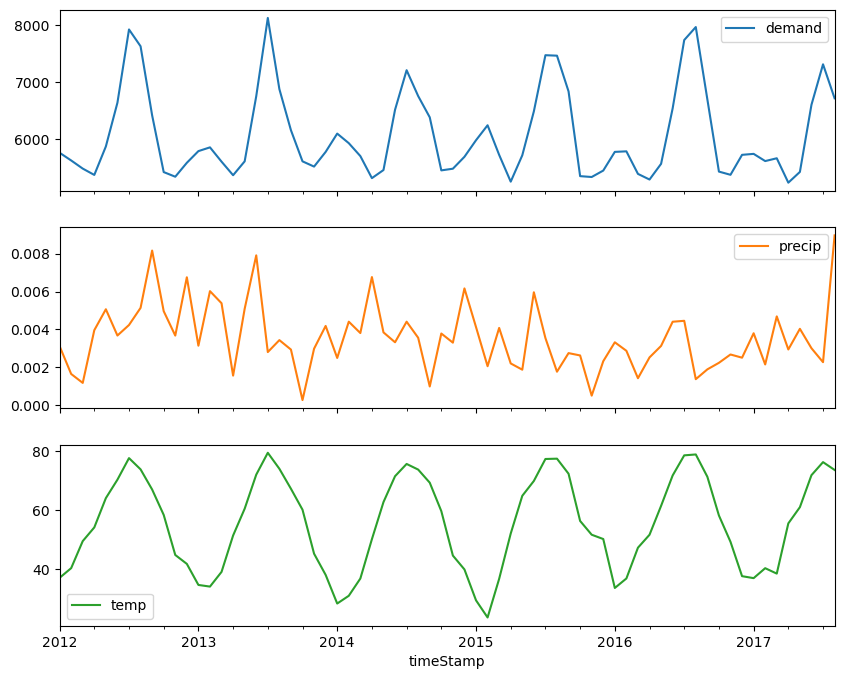

In [14]:
ny_df.resample('M').mean().plot(subplots = True)

In [15]:
ny_df_monthly = ny_df.resample('M').mean()

In [16]:
ny_df_monthly

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [17]:
!pip install pmdarima --quiet

#### NOTE:
Arima is like a grid search. It takes some parameters like p, d, q (here) and finds the best value based on the metric (AIC, here) given. You take the forecasting error (set by the d parameter, and calculate the lag in the forecasting error.

Here, we are not specifying the d parameter manually but used the `test` variable to determine it 

`Akaike Information Criterion (AIC)`: relative difference between the fitted likelihood and true likelihood.

In [44]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'], 
                     seasonal=True, m = 12, 
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1063.010, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1064.513, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1062.727, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1033.160, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1031.958, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1052.217, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1031.863, Time=0.04 sec
 A

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -506.605
Date:                Thu, 11 Apr 2024   AIC                           1021.211
Time:                        22:31:27   BIC                           1030.089
Sample:                    01-31-2012   HQIC                          1024.728
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.5907    507.051      7.340      0.000    2727.789    4715.393
ar.L1          1.0936      0.075     14.646      0.000       0.947       1.240
ar.L2         -0.7077      0.085     -8.364      0.000      -0.874      -0.542
sigma2      1.725e+05   3.37e+04      5.112      0.000    1.06e+05    2.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.52   Prob(JB):                         0.25
Heteroskedasticity (H):               0.83   Skew:                             0.50
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### splitting into train and test dataset 

In [20]:
train = ny_df_monthly['2012-01-31':'2017-04-30']
test = ny_df_monthly['2017-05-30':]

In [21]:
test

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [22]:
print(test.shape, train.shape)

(4, 3) (64, 3)


In [23]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [24]:
# return_conf_int is the return_conf_interval 

forecast = model.predict(n_periods = 4, return_conf_int = True)

In [25]:
forecast

(2017-05-31    5416.272177
 2017-06-30    5912.706278
 2017-07-31    6333.542913
 2017-08-31    6454.636229
 Freq: M, dtype: float64,
 array([[4598.69196947, 6233.85238386],
        [4696.17796695, 7129.23458979],
        [5043.80726973, 7623.27855664],
        [5156.23939022, 7753.03306768]]))

In [26]:
forecast[0]

2017-05-31    5416.272177
2017-06-30    5912.706278
2017-07-31    6333.542913
2017-08-31    6454.636229
Freq: M, dtype: float64

In [27]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns = ['Prediction'])

In [28]:
forecast_df

Prediction
timeStamp              
2017-05-31  5416.272177
2017-06-30  5912.706278
2017-07-31  6333.542913
2017-08-31  6454.636229

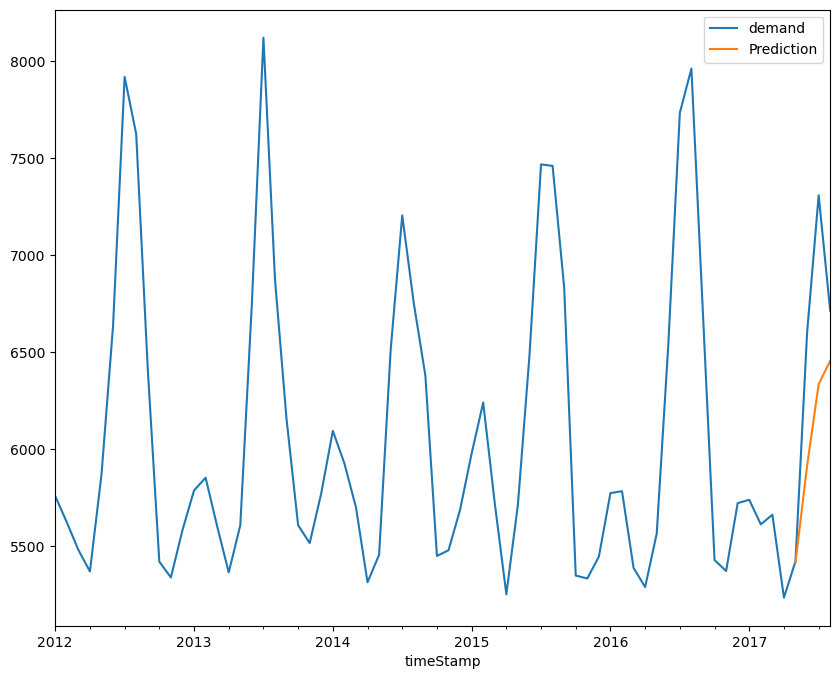

In [29]:
pd.concat([ny_df_monthly['demand'], forecast_df], axis = 1).plot()

plt.show()


In [30]:
### increasing the test range ( going in future)

forecast1 = model.predict(n_periods = 8, return_conf_int = True)

In [31]:
forecast1

(2017-05-31    5416.272177
 2017-06-30    5912.706278
 2017-07-31    6333.542913
 2017-08-31    6454.636229
 2017-09-30    6297.634205
 2017-10-31    6041.076033
 2017-11-30    5866.742057
 2017-12-31    5851.710582
 Freq: M, dtype: float64,
 array([[4598.69196947, 6233.85238386],
        [4696.17796695, 7129.23458979],
        [5043.80726973, 7623.27855664],
        [5156.23939022, 7753.03306768],
        [4919.96886079, 7675.29954927],
        [4605.35394429, 7476.79812235],
        [4425.37377502, 7308.11033854],
        [4403.70564756, 7299.7155164 ]]))

In [32]:
forecast_range = pd.date_range(start = '2017-05-31', periods = 8, freq = 'M')

In [33]:
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [34]:
forecast1_df = pd.DataFrame(forecast1[0], index = forecast_range, columns = ['Prediction'])

In [35]:
forecast1_df

Prediction
2017-05-31  5416.272177
2017-06-30  5912.706278
2017-07-31  6333.542913
2017-08-31  6454.636229
2017-09-30  6297.634205
2017-10-31  6041.076033
2017-11-30  5866.742057
2017-12-31  5851.710582

<Axes: >

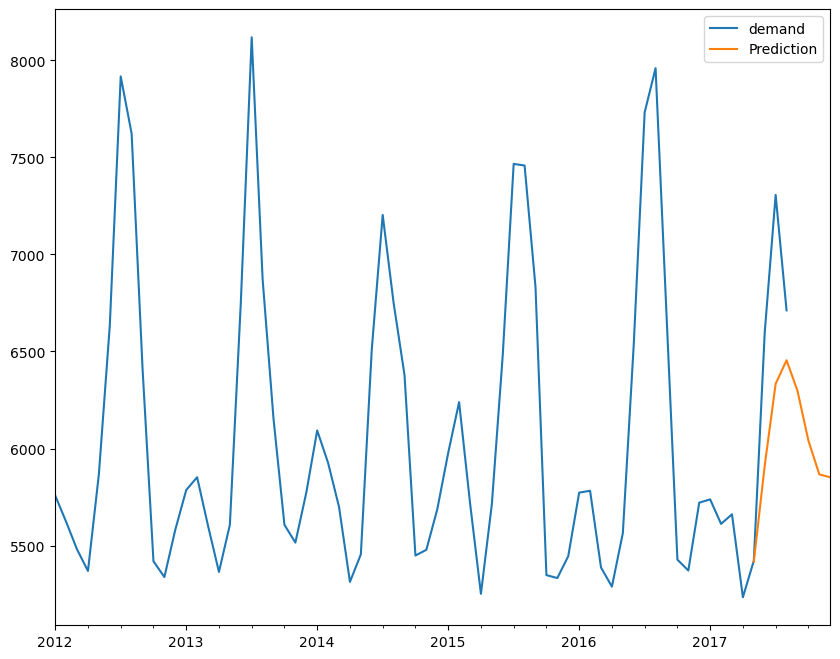

In [36]:
pd.concat([ny_df_monthly['demand'], forecast1_df], axis = 1).plot()

In [37]:
lower = pd.Series(forecast1[1][:,0], index = forecast_range)
upper = pd.Series(forecast1[1][:,1], index = forecast_range)


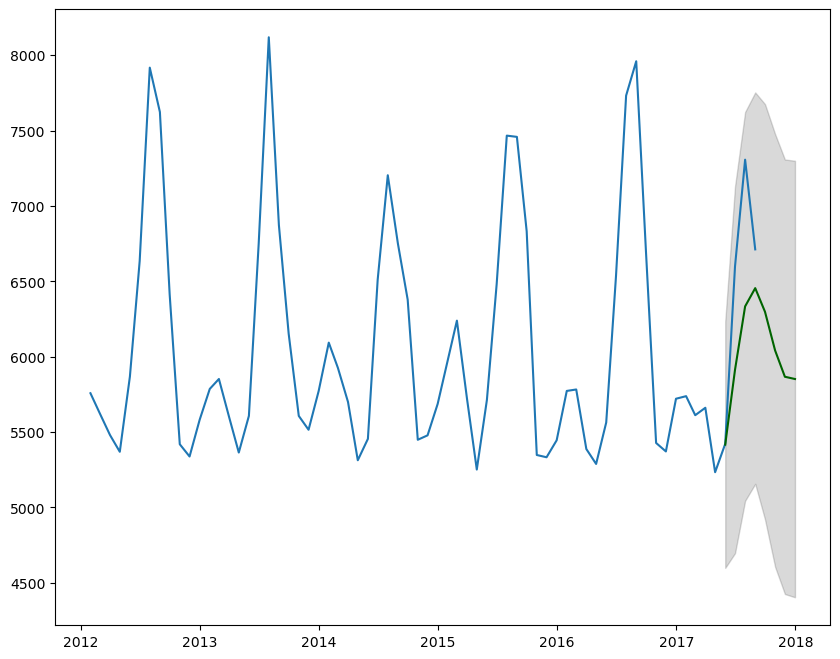

In [38]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color = 'darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color = 'k', alpha = .15)

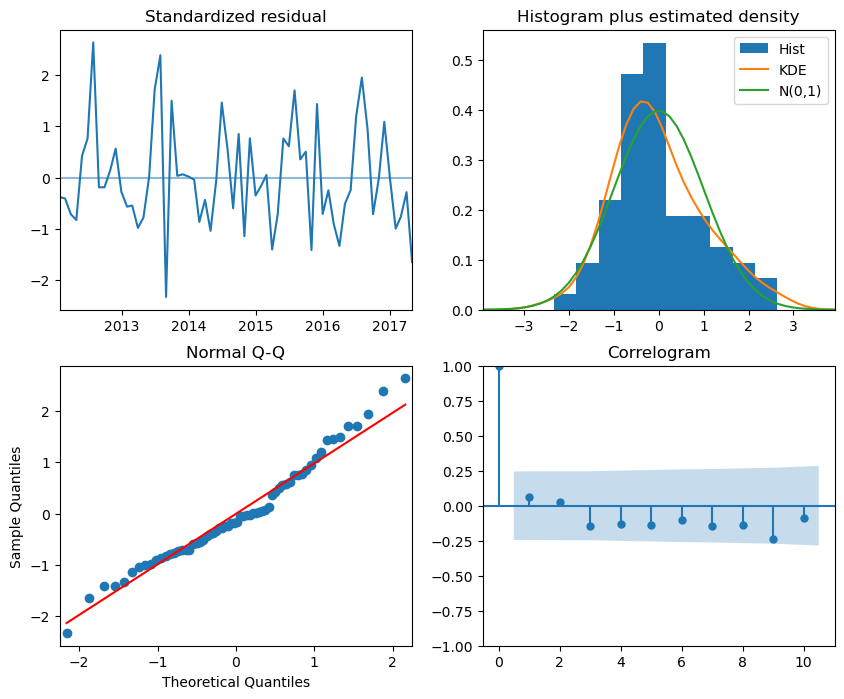

In [39]:
out = model.plot_diagnostics()